In [1]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
pd.options.display.max_colwidth = None
pd.set_option('display.float_format', lambda x: '%.5f' %x)
pd.set_option('display.max_columns', None)
sns.set(font_scale=1.7)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from numpy import absolute
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import re
import math
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, validation_curve, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from scipy import stats,spatial
from sklearn import decomposition, tree, linear_model
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans
import scipy
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.feature_selection import RFE, RFECV
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_classification
from sklearn.impute import KNNImputer
from sklearn import neighbors
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot
import time

In [2]:
df = pd.read_csv('df.csv')
df = df.drop(["Unnamed: 0"], axis= 1)
df

,PropertyGFATotal,SiteEnergyUse(kBtu),TotalGHGEmissions,YearBuilt,NumberofBuildings,NumberofFloors,ENERGYSTARScore,distance,code_1,code_2,code_3,code_4,code_5,code_6,code_7,code_8,code_9,code_10,type_1,type_2,type_3,type_4,type_5,type_6,type_7,type_8,type_9
0,-0.18113,-0.04651,0.07920,-1.15292,-0.04707,0.90919,-0.19108,-1.06756,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,-0.10695,0.00045,0.13488,1.01960,-0.04707,0.78181,-0.15597,-1.01397,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,4.07237,2.59553,2.31137,0.16948,-0.04707,4.60336,-0.78784,-1.10610,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,-0.31405,-0.06396,0.12344,-1.18440,-0.04707,0.65442,-0.33149,-1.08252,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,0.24607,0.23428,0.38871,0.51582,-0.04707,1.67350,0.33548,-1.14370,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,-0.49215,-0.15992,-0.06058,-1.08995,-0.04707,-0.36466,-1.98136,1.71342,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1088,-0.39405,-0.28501,-0.21296,1.61782,-0.04707,-0.23727,0.40569,-0.00160,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1089,-0.54768,-0.31829,-0.21992,-0.36578,-0.04707,-0.49204,0.33548,-0.74040,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1090,-0.53917,-0.32294,-0.21472,-0.11389,-0.04707,-0.49204,0.96734,1.01940,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000


In [3]:
X = df.drop(["SiteEnergyUse(kBtu)","TotalGHGEmissions"], axis= 1)
y_energy = df["SiteEnergyUse(kBtu)"]
y_ghg = df["TotalGHGEmissions"]

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PropertyGFATotal   1092 non-null   float64
 1   YearBuilt          1092 non-null   float64
 2   NumberofBuildings  1092 non-null   float64
 3   NumberofFloors     1092 non-null   float64
 4   ENERGYSTARScore    1092 non-null   float64
 5   distance           1092 non-null   float64
 6   code_1             1092 non-null   float64
 7   code_2             1092 non-null   float64
 8   code_3             1092 non-null   float64
 9   code_4             1092 non-null   float64
 10  code_5             1092 non-null   float64
 11  code_6             1092 non-null   float64
 12  code_7             1092 non-null   float64
 13  code_8             1092 non-null   float64
 14  code_9             1092 non-null   float64
 15  code_10            1092 non-null   float64
 16  type_1             1092 

In [5]:
y_energy.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1092 entries, 0 to 1091
Series name: SiteEnergyUse(kBtu)
Non-Null Count  Dtype  
--------------  -----  
1092 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB


In [6]:
y_ghg.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1092 entries, 0 to 1091
Series name: TotalGHGEmissions
Non-Null Count  Dtype  
--------------  -----  
1092 non-null   float64
dtypes: float64(1)
memory usage: 8.7 KB


In [7]:
y_energy = np.log1p(y_energy)
y_energy

0      -0.04762
1       0.00045
2       1.27969
3      -0.06610
4       0.21049
         ...   
1087   -0.17426
1088   -0.33549
1089   -0.38316
1090   -0.38999
1091   -0.36279
Name: SiteEnergyUse(kBtu), Length: 1092, dtype: float64

In [8]:
y_ghg = np.log1p(y_ghg)
y_ghg

0       0.07622
1       0.12653
2       1.19736
3       0.11639
4       0.32837
         ...   
1087   -0.06249
1088   -0.23947
1089   -0.24836
1090   -0.24171
1091   -0.22159
Name: TotalGHGEmissions, Length: 1092, dtype: float64

# K-Best - energy

In [9]:
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(X, y_energy ,  train_size=0.33, random_state=42)

In [10]:
X_train_ghg, X_test_ghg, y_train_ghg, y_test_ghg = train_test_split(X, y_energy ,  train_size=0.33, random_state=42)

In [11]:
KBest_energy= SelectKBest(f_regression, k=8)
KBest_energy.fit_transform(X_train_energy, y_train_energy)

array([[-0.49989673, -0.23983349, -0.04707211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77199427,  0.83068079, -0.04707211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88320029, -1.05846206, -0.04707211, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.31676284, -1.1529192 , -0.04707211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38924956,  1.33445222, -0.04707211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43473691, -0.14537635, -0.04707211, ...,  0.        ,
         0.        ,  0.        ]])

In [12]:
slct_kbest_energy = KBest_energy.get_support()
slct_kbest_energy 

array([ True,  True,  True,  True, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False])

In [13]:
X.columns[slct_kbest_energy].tolist()

['PropertyGFATotal',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'distance',
 'code_4',
 'code_6',
 'type_6']

# K-Best - ghg

In [14]:
KBest_ghg= SelectKBest(f_regression, k=8)
KBest_ghg.fit_transform(X_train_ghg, y_train_ghg)

array([[-0.49989673, -0.23983349, -0.04707211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77199427,  0.83068079, -0.04707211, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.88320029, -1.05846206, -0.04707211, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.31676284, -1.1529192 , -0.04707211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38924956,  1.33445222, -0.04707211, ...,  0.        ,
         0.        ,  0.        ],
       [-0.43473691, -0.14537635, -0.04707211, ...,  0.        ,
         0.        ,  0.        ]])

In [15]:
slct_kbest_ghg = KBest_ghg.get_support()
slct_kbest_ghg

array([ True,  True,  True,  True, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False])

In [16]:
X.columns[slct_kbest_ghg].tolist()

['PropertyGFATotal',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'distance',
 'code_4',
 'code_6',
 'type_6']

# Recursive Feature Elimination - Energy

In [17]:
select_energy = RFE(RandomForestRegressor(n_estimators=10), n_features_to_select=11)
select_energy.fit(X_train_energy, y_train_energy)
select_energy.ranking_

array([ 1,  1,  7,  1,  1,  1,  2,  9, 14,  1,  6,  1,  4,  3, 11,  1,  8,
        1, 12, 10,  1, 15,  5, 13,  1])

In [18]:
slct_energy = select_energy.support_
slct_energy

array([ True,  True, False,  True,  True,  True, False, False, False,
        True, False,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False,  True])

In [19]:
features_energy = X.columns[slct_energy].tolist()
features_energy

['PropertyGFATotal',
 'YearBuilt',
 'NumberofFloors',
 'ENERGYSTARScore',
 'distance',
 'code_4',
 'code_6',
 'code_10',
 'type_2',
 'type_5',
 'type_9']

In [20]:
energy_X = X[features_energy]
energy_X

,PropertyGFATotal,YearBuilt,NumberofFloors,ENERGYSTARScore,distance,code_4,code_6,code_10,type_2,type_5,type_9
0,-0.18113,-1.15292,0.90919,-0.19108,-1.06756,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,-0.10695,1.01960,0.78181,-0.15597,-1.01397,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,4.07237,0.16948,4.60336,-0.78784,-1.10610,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,-0.31405,-1.18440,0.65442,-0.33149,-1.08252,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.24607,0.51582,1.67350,0.33548,-1.14370,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
1087,-0.49215,-1.08995,-0.36466,-1.98136,1.71342,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
1088,-0.39405,1.61782,-0.23727,0.40569,-0.00160,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1089,-0.54768,-0.36578,-0.49204,0.33548,-0.74040,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1090,-0.53917,-0.11389,-0.49204,0.96734,1.01940,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000


In [21]:
# préparation pour energy  -  dataframe sans Energystarscore
energy_df = energy_X.drop(['ENERGYSTARScore'], axis= 1)
energy_df

,PropertyGFATotal,YearBuilt,NumberofFloors,distance,code_4,code_6,code_10,type_2,type_5,type_9
0,-0.18113,-1.15292,0.90919,-1.06756,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1,-0.10695,1.01960,0.78181,-1.01397,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,4.07237,0.16948,4.60336,-1.10610,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,-0.31405,-1.18440,0.65442,-1.08252,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
4,0.24607,0.51582,1.67350,-1.14370,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...
1087,-0.49215,-1.08995,-0.36466,1.71342,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000
1088,-0.39405,1.61782,-0.23727,-0.00160,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000
1089,-0.54768,-0.36578,-0.49204,-0.74040,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1090,-0.53917,-0.11389,-0.49204,1.01940,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000


# Recursive Feature Elimination - GHG

In [22]:
select_ghg = RFE(RandomForestRegressor(n_estimators=10), n_features_to_select=11)
select_ghg.fit(X_train_ghg, y_train_ghg)
select_ghg.ranking_

array([ 1,  1, 15,  1,  1,  1,  2, 13, 11,  3,  5,  1,  4,  8, 12,  1,  6,
        9,  7, 10,  1, 14,  1,  1,  1])

In [23]:
slct_ghg = select_ghg.support_
slct_ghg

array([ True,  True, False,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False,  True, False,  True,  True,  True])

In [24]:
df_rfe_ghg = X.columns[slct_ghg].tolist()
df_rfe_ghg

['PropertyGFATotal',
 'YearBuilt',
 'NumberofFloors',
 'ENERGYSTARScore',
 'distance',
 'code_6',
 'code_10',
 'type_5',
 'type_7',
 'type_8',
 'type_9']

In [25]:
ghg_x = X[df_rfe_ghg]
ghg_x

,PropertyGFATotal,YearBuilt,NumberofFloors,ENERGYSTARScore,distance,code_6,code_10,type_5,type_7,type_8,type_9
0,-0.18113,-1.15292,0.90919,-0.19108,-1.06756,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,-0.10695,1.01960,0.78181,-0.15597,-1.01397,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,4.07237,0.16948,4.60336,-0.78784,-1.10610,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,-0.31405,-1.18440,0.65442,-0.33149,-1.08252,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,0.24607,0.51582,1.67350,0.33548,-1.14370,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...
1087,-0.49215,-1.08995,-0.36466,-1.98136,1.71342,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1088,-0.39405,1.61782,-0.23727,0.40569,-0.00160,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1089,-0.54768,-0.36578,-0.49204,0.33548,-0.74040,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1090,-0.53917,-0.11389,-0.49204,0.96734,1.01940,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000


In [26]:
# préparation pour ghg  -  dataframe sans Energystarscore
ghg_df = ghg_x.drop(['ENERGYSTARScore'], axis= 1)
ghg_df

,PropertyGFATotal,YearBuilt,NumberofFloors,distance,code_6,code_10,type_5,type_7,type_8,type_9
0,-0.18113,-1.15292,0.90919,-1.06756,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
1,-0.10695,1.01960,0.78181,-1.01397,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
2,4.07237,0.16948,4.60336,-1.10610,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
3,-0.31405,-1.18440,0.65442,-1.08252,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
4,0.24607,0.51582,1.67350,-1.14370,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...
1087,-0.49215,-1.08995,-0.36466,1.71342,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1088,-0.39405,1.61782,-0.23727,-0.00160,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1089,-0.54768,-0.36578,-0.49204,-0.74040,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
1090,-0.53917,-0.11389,-0.49204,1.01940,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000


# - DATAFRAME-GHG AVEC ENERGYSTARSCORE

In [27]:
X_train_rfe_ghg, X_test_rfe_ghg, y_train_rfe_ghg, y_test_rfe_ghg = train_test_split(ghg_x, y_ghg ,  train_size=0.33, random_state=42)

In [28]:
X_train_rfe_energy, X_test_rfe_energy, y_train_rfe_energy, y_test_rfe_energy = train_test_split(energy_X, y_energy ,  train_size=0.33, random_state=42)

In [29]:
tableau_ghg_energystar = pd.DataFrame(columns = ['R² test','R² train','RMSE test','RMSE train','Prediction time','Best parameters', "Best score"]).rename_axis('Modele pour GHG avec ENERGYSTARSCORE')

In [30]:
# Fonction qui va permettre de calculer les hyperparamètre de tout les modèle choisie par Cross-Validation
def ghg_energystar(X_train_rfe_ghg, y_train_rfe_ghg ,X_test_rfe_ghg ,y_test_rfe_ghg ,model,pg):

    model_ghg = RandomizedSearchCV(estimator = model, param_distributions=pg, scoring="r2",cv=5)# model
        
    model_ghg.fit(X_train_rfe_ghg, y_train_rfe_ghg) #Fit jeu d'entrainement
    start_time = time.time()   #préparation du temps
    score_test = round(r2_score(y_test_rfe_ghg,model_ghg.predict(X_test_rfe_ghg)), 6)  #calcul du score R² test
    score_train = round(r2_score(y_train_rfe_ghg,model_ghg.predict(X_train_rfe_ghg)),6)  #calcul du score R² train
    RMSE_test = round(mean_squared_error(y_test_rfe_ghg,model_ghg.predict(X_test_rfe_ghg)), 6)#calcul de la RMSE test
    RMSE_train = round(mean_squared_error(y_train_rfe_ghg,model_ghg.predict(X_train_rfe_ghg)), 6) # calcul de la RMSE train
    pred_time = round(time.time()-start_time, 7)  #calcul du temps 
    best_param = model_ghg.best_params_ # Détermination des meilleurs paramètres
    best_score = model_ghg.best_score_ # Détermination de meilleur score
    for k, v in best_param.items():
        if type(v)!= str :
            best_param[k] = round(v, 7)
            
    print("score train=",score_train, ", score cv=", best_score, ", score test=", score_test )
    print("best param=", best_param )        
  
    return score_test, score_train,RMSE_test, RMSE_train, pred_time, best_param, best_score, model_ghg.best_estimator_

In [31]:
# Fonction qui prépare un dataframe 
def tableau_ghg_star(X_train_rfe_ghg,y_train_rfe_ghg,X_test_rfe_ghg,y_test_rfe_ghg,model,pg):
  
    score_test, score_train,RMSE_test,RMSE_train, pred_time, best_param, best_score, best_model = \
     ghg_energystar(X_train_rfe_ghg,y_train_rfe_ghg,X_test_rfe_ghg,y_test_rfe_ghg,model,pg)
    tableau_ghg_energystar.loc[str(model),:] = [ score_test, score_train,RMSE_test, RMSE_train ,pred_time, best_param, best_score]
    
    return best_model

###### Régressions Simple - GHG 

/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


score train= 0.368032 , score cv= 0.2532154496319402 , score test= 0.493291
best param= {}


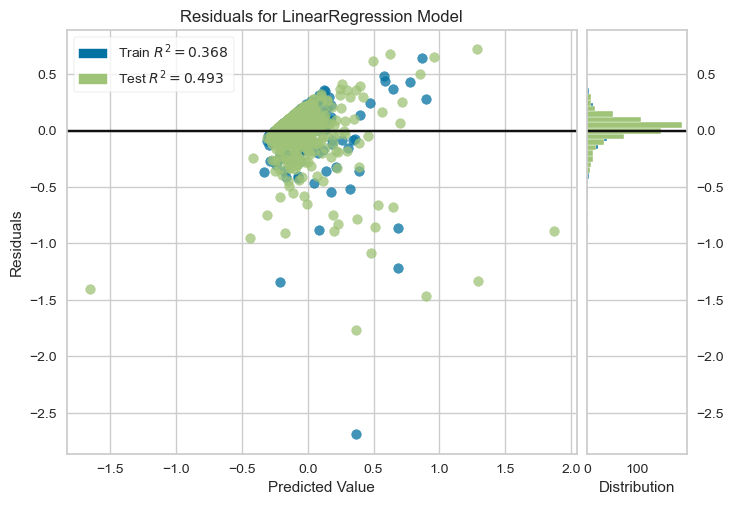

CPU times: user 1.13 s, sys: 53.4 ms, total: 1.19 s
Wall time: 1.1 s


<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [32]:
%%time
Linear_ghg_energystar = linear_model.LinearRegression()
pg = {}
best_model = tableau_ghg_star(X_train_rfe_ghg,y_train_rfe_ghg,X_test_rfe_ghg,y_test_rfe_ghg,Linear_ghg_energystar, pg)
visualizer_linear_rfe_ghg = ResidualsPlot(best_model) 
visualizer_linear_rfe_ghg.fit(X_train_rfe_ghg, y_train_rfe_ghg) 
visualizer_linear_rfe_ghg.score(X_test_rfe_ghg, y_test_rfe_ghg)  
visualizer_linear_rfe_ghg.show()

###### Régressions Ridge - GHG

score train= 0.367996 , score cv= 0.2562826398111473 , score test= 0.493633
best param= {'alpha': 0.4023506}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


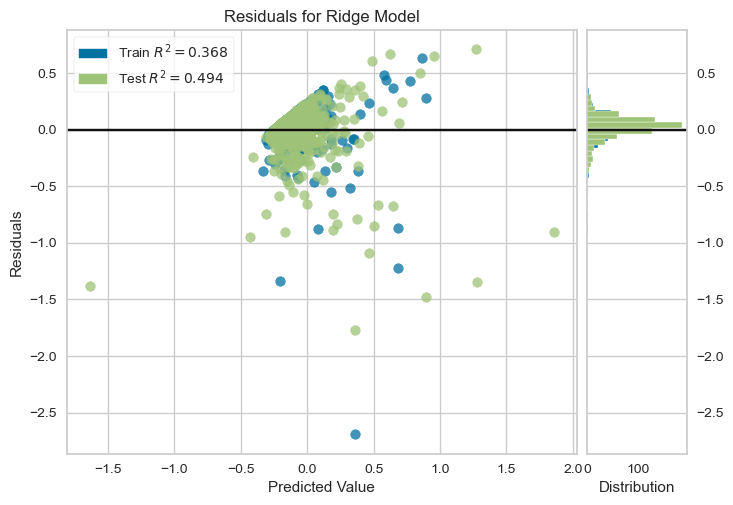

CPU times: user 1.37 s, sys: 39.3 ms, total: 1.41 s
Wall time: 1.1 s


<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [33]:
%%time 
ridge_ghg_energystar = Ridge()
pg= {"alpha": np.logspace(-5, 5, 1000)}
best_model = tableau_ghg_star(X_train_rfe_ghg,y_train_rfe_ghg,X_test_rfe_ghg,y_test_rfe_ghg,ridge_ghg_energystar,pg)
visualizer_linear_rfe_ghg = ResidualsPlot(best_model) 
visualizer_linear_rfe_ghg.fit(X_train_rfe_ghg, y_train_rfe_ghg) 
visualizer_linear_rfe_ghg.score(X_test_rfe_ghg, y_test_rfe_ghg)  
visualizer_linear_rfe_ghg.show() 

###### Régressions Lasso - GHG

score train= 0.362542 , score cv= 0.26322747503194527 , score test= 0.492868
best param= {'alpha': 0.002412}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


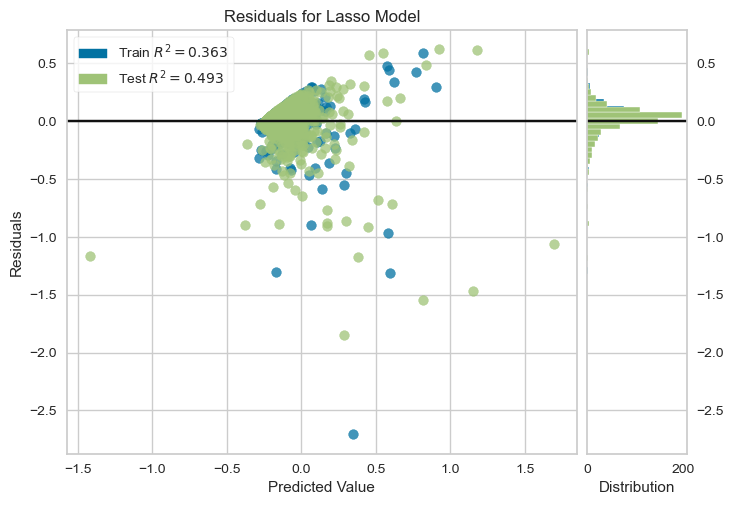

CPU times: user 1.06 s, sys: 34.7 ms, total: 1.09 s
Wall time: 1.21 s


<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [34]:
%%time
lasso_ghg_energystar = Lasso()
pg={"alpha": np.logspace(-5, 5, 1000)}
best_model = tableau_ghg_star(X_train_rfe_ghg,y_train_rfe_ghg,X_test_rfe_ghg,y_test_rfe_ghg,lasso_ghg_energystar,pg)
visualizer_linear_rfe_ghg = ResidualsPlot(best_model) 
visualizer_linear_rfe_ghg.fit(X_train_rfe_ghg, y_train_rfe_ghg) 
visualizer_linear_rfe_ghg.score(X_test_rfe_ghg, y_test_rfe_ghg)  
visualizer_linear_rfe_ghg.show()

###### Régressions Elastic - GHG

score train= 0.343495 , score cv= 0.2606837482849619 , score test= 0.476335
best param= {'l1_ratio': 0.4, 'alpha': 0.0115628}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


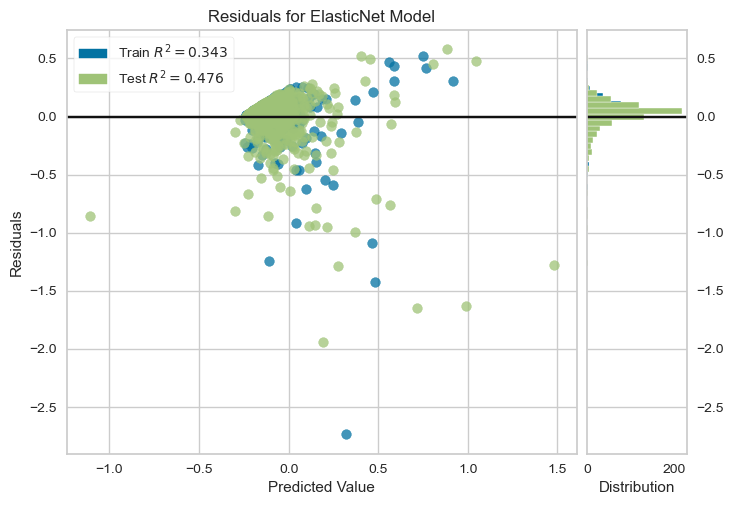

CPU times: user 1.16 s, sys: 39.2 ms, total: 1.2 s
Wall time: 1.41 s


<AxesSubplot:title={'center':'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
%%time
elastic_ghg_energystar = ElasticNet()
pg = {"alpha": np.logspace(-5, 5, 1000), "l1_ratio":[.2, .4, .6, .8]}
best_model = tableau_ghg_star(X_train_rfe_ghg,y_train_rfe_ghg,X_test_rfe_ghg,y_test_rfe_ghg,elastic_ghg_energystar,pg)
visualizer_linear_rfe_ghg = ResidualsPlot(best_model) 
visualizer_linear_rfe_ghg.fit(X_train_rfe_ghg, y_train_rfe_ghg) 
visualizer_linear_rfe_ghg.score(X_test_rfe_ghg, y_test_rfe_ghg)  
visualizer_linear_rfe_ghg.show()

###### Régressions RandomForestRegressor - GHG

score train= 0.573339 , score cv= 0.37882458663876184 , score test= 0.442257
best param= {'n_estimators': 45, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 11, 'max_depth': 2, 'criterion': 'squared_error'}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


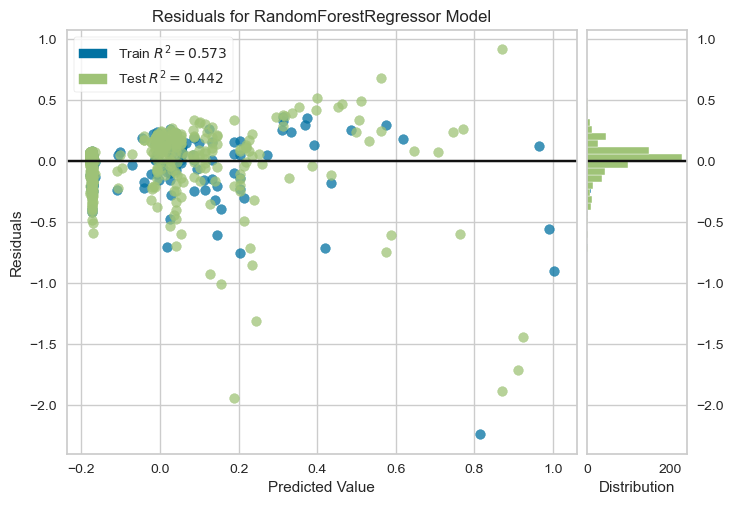

CPU times: user 6.93 s, sys: 152 ms, total: 7.08 s
Wall time: 8.36 s


<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [36]:
%%time
rfr_ghg_energystar = RandomForestRegressor(random_state=10)
pg={"n_estimators":[25 ,30, 35, 40, 45, 50], "criterion":["squared_error","absolute_error"],"max_depth":[2],
"min_samples_split":range(6,11),"min_samples_leaf":[4,5,6],"max_features" :range (6, X_train_rfe_energy.shape[1]+1)}

best_model = tableau_ghg_star(X_train_rfe_ghg,y_train_rfe_ghg,X_test_rfe_ghg,y_test_rfe_ghg,rfr_ghg_energystar,pg)

visualizer_linear_rfe_ghg = ResidualsPlot(best_model) 
visualizer_linear_rfe_ghg.fit(X_train_rfe_ghg, y_train_rfe_ghg) 
visualizer_linear_rfe_ghg.score(X_test_rfe_ghg, y_test_rfe_ghg)  
visualizer_linear_rfe_ghg.show()

###### Regression GradientBoostingRegressor - GHG

score train= 0.099355 , score cv= 0.052020543950220974 , score test= 0.086627
best param= {'subsample': 0.5, 'random_state': 42, 'n_estimators': 20, 'max_depth': 1, 'learning_rate': 0.01}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


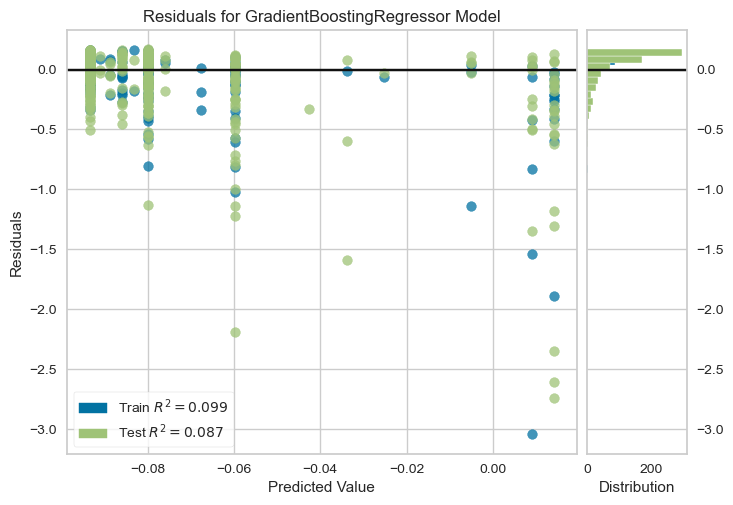

CPU times: user 2.23 s, sys: 23.8 ms, total: 2.26 s
Wall time: 2.33 s


<AxesSubplot:title={'center':'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [77]:
%%time
gbr_ghg_energystar =  GradientBoostingRegressor()
pg= {'n_estimators' : [10,20,50,100], 'learning_rate': [0.001, 0.01, 0.1],'max_depth':[1, 2, 4, 6, 7], 
     'subsample':[0.5, 0.75, 1], 'random_state':[42]}
best_model = tableau_ghg_star(X_train_rfe_ghg,y_train_rfe_ghg,X_test_rfe_ghg,y_test_rfe_ghg,gbr_ghg_energystar,pg)
visualizer_linear_rfe_ghg = ResidualsPlot(best_model) 
visualizer_linear_rfe_ghg.fit(X_train_rfe_ghg, y_train_rfe_ghg) 
visualizer_linear_rfe_ghg.score(X_test_rfe_ghg, y_test_rfe_ghg)  
visualizer_linear_rfe_ghg.show()

###### TABLEAU DE REGRESSION - Model pour GHG avec ENERGYSTARSCORE

In [78]:
tableau_ghg_energystar

,R² test,R² train,RMSE test,RMSE train,Prediction time,Best parameters,Best score
Modele pour GHG avec ENERGYSTARSCORE,,,,,,,
LinearRegression(),0.49329,0.36803,0.04251,0.05354,0.00791,{},0.25322
Ridge(),0.49363,0.36800,0.04248,0.05355,0.00725,{'alpha': 0.4023506},0.25628
Lasso(),0.49287,0.36254,0.04254,0.05401,0.00576,{'alpha': 0.002412},0.26323
ElasticNet(),0.47634,0.34349,0.04393,0.05562,0.00790,"{'l1_ratio': 0.4, 'alpha': 0.0115628}",0.26068
RandomForestRegressor(random_state=10),0.44226,0.57334,0.04679,0.03615,0.02805,"{'n_estimators': 45, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 11, 'max_depth': 2, 'criterion': 'squared_error'}",0.37882
GradientBoostingRegressor(),0.08663,0.09935,0.07662,0.07631,0.00640,"{'subsample': 0.5, 'random_state': 42, 'n_estimators': 20, 'max_depth': 1, 'learning_rate': 0.01}",0.05202


# - DATAFRAME-ENERGY AVEC ENERGYSTARSCORE

In [39]:
tableau_energy_energystar = pd.DataFrame(columns = ['R² test','R² train','RMSE test', 'RMSE train' ,'Prediction time','Best parameters', "Best score"]).rename_axis('Modele pour energy avec ENERGYSTARSCORE')

In [40]:
def energy_energystar(X_train_rfe_energy, y_train_rfe_energy ,X_test_rfe_energy ,y_test_rfe_energy ,model,pg):
    
    model_gs = RandomizedSearchCV(estimator = model, param_distributions=pg, scoring="r2",cv=5)# model
        
    model_gs.fit(X_train_rfe_energy, y_train_rfe_energy) #Fit jeu d'entrainement
    start_time = time.time()   #préparation du temps 
    score_test = round(r2_score(y_test_rfe_energy,model_gs.predict(X_test_rfe_energy)), 6)  #calcul du score R² test
    score_train = round(r2_score(y_train_rfe_energy,model_gs.predict(X_train_rfe_energy)),6)  #calcul du score R² train
    RMSE_test = round(mean_squared_error(y_test_rfe_energy,model_gs.predict(X_test_rfe_energy)), 6)  #calcul de la RMSE test
    RMSE_train = round(mean_squared_error(y_train_rfe_energy,model_gs.predict(X_train_rfe_energy)), 6)
    pred_time = round(time.time()-start_time, 7)  #calcul du temps 
    best_param = model_gs.best_params_ # Détermination des meilleurs paramètres
    best_score = model_gs.best_score_ # Détermination du meilleur score
    for k, v in best_param.items():
        if type(v)!= str :
            best_param[k] = round(v, 7)
            
    print("score train=",score_train, ", score cv=", best_score, ", score test=", score_test )
    print("best param=", best_param )
    
    return score_test, score_train,RMSE_test, RMSE_train, pred_time, best_param, best_score, model_gs.best_estimator_


In [41]:
# préparation du dataframe 
def tableau_energy_star(X_train_rfe_energy,y_train_rfe_energy,X_test_rfe_energy,y_test_rfe_energy,model,pg):
    
    score_test, score_train,RMSE_test, RMSE_train, pred_time, best_param, best_score, best_model = \
       energy_energystar(X_train_rfe_energy,y_train_rfe_energy,X_test_rfe_energy,y_test_rfe_energy,model,pg)
    tableau_energy_energystar.loc[str(model),:] = [ score_test, score_train,RMSE_test, RMSE_train, pred_time, best_param, best_score]
    
    return best_model

###### Régressions Simple - ENERGY 

score train= 0.563431 , score cv= 0.4915129102553163 , score test= 0.67369
best param= {}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


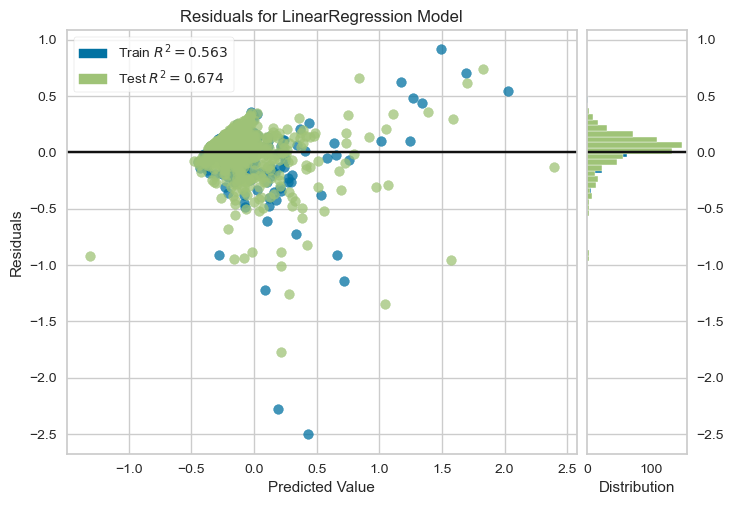

CPU times: user 1.02 s, sys: 25.5 ms, total: 1.04 s
Wall time: 883 ms


<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
%%time
Linear_energy_energystar = linear_model.LinearRegression()
pg={}
best_model = tableau_energy_star(X_train_rfe_energy,y_train_rfe_energy,X_test_rfe_energy,y_test_rfe_energy, Linear_energy_energystar,pg)
visualizer_linear_rfe_energy = ResidualsPlot(best_model) 
visualizer_linear_rfe_energy.fit(X_train_rfe_energy, y_train_rfe_energy) 
visualizer_linear_rfe_energy.score(X_test_rfe_energy, y_test_rfe_energy)  
visualizer_linear_rfe_energy.show() 

###### Régressions Ridge - ENERGY

score train= 0.563405 , score cv= 0.4935455888126389 , score test= 0.674961
best param= {'alpha': 0.8809372}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


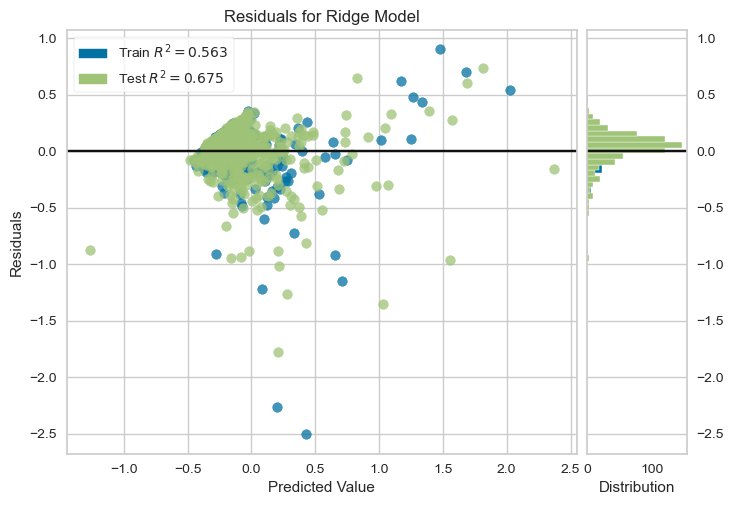

CPU times: user 1.31 s, sys: 32.5 ms, total: 1.34 s
Wall time: 940 ms


<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [43]:
%%time
ridge_energy_energystar = Ridge()
pg={"alpha": np.logspace(-5, 5, 1000)}
best_model = tableau_energy_star(X_train_rfe_energy,y_train_rfe_energy,X_test_rfe_energy,y_test_rfe_energy,ridge_energy_energystar,pg)
visualizer_linear_rfe_energy = ResidualsPlot(best_model) 
visualizer_linear_rfe_energy.fit(X_train_rfe_energy, y_train_rfe_energy) 
visualizer_linear_rfe_energy.score(X_test_rfe_energy, y_test_rfe_energy)  
visualizer_linear_rfe_energy.show() 

###### Régressions Lasso - ENERGY

score train= 0.544087 , score cv= 0.5021950907292252 , score test= 0.680034
best param= {'alpha': 0.0089733}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


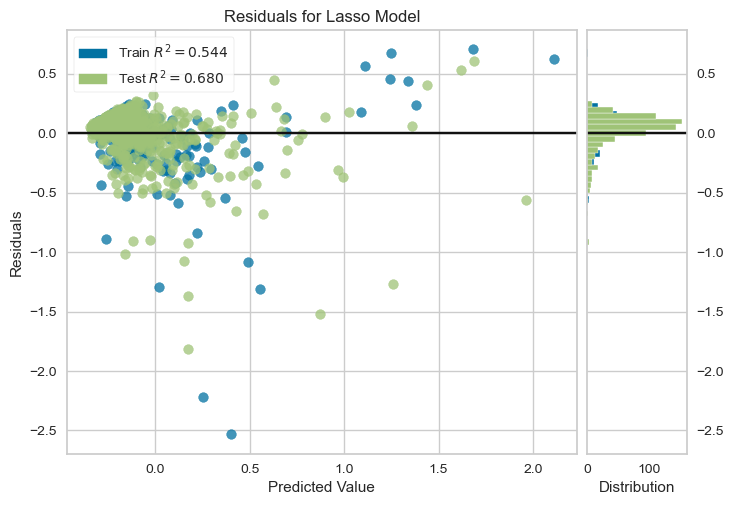

CPU times: user 863 ms, sys: 25.7 ms, total: 889 ms
Wall time: 897 ms


<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [44]:
%%time
lasso_energy_energystar = Lasso()
pg={"alpha": np.logspace(-5, 5, 1000)}
best_model = tableau_energy_star(X_train_rfe_energy,y_train_rfe_energy,X_test_rfe_energy,y_test_rfe_energy,lasso_energy_energystar,pg)
visualizer_linear_rfe_energy = ResidualsPlot(best_model) 
visualizer_linear_rfe_energy.fit(X_train_rfe_energy, y_train_rfe_energy) 
visualizer_linear_rfe_energy.score(X_test_rfe_energy, y_test_rfe_energy)  
visualizer_linear_rfe_energy.show() 

###### Régressions Elastic - ENERGY

score train= 0.539436 , score cv= 0.5108648930054667 , score test= 0.670401
best param= {'l1_ratio': 0.6, 'alpha': 0.0220467}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


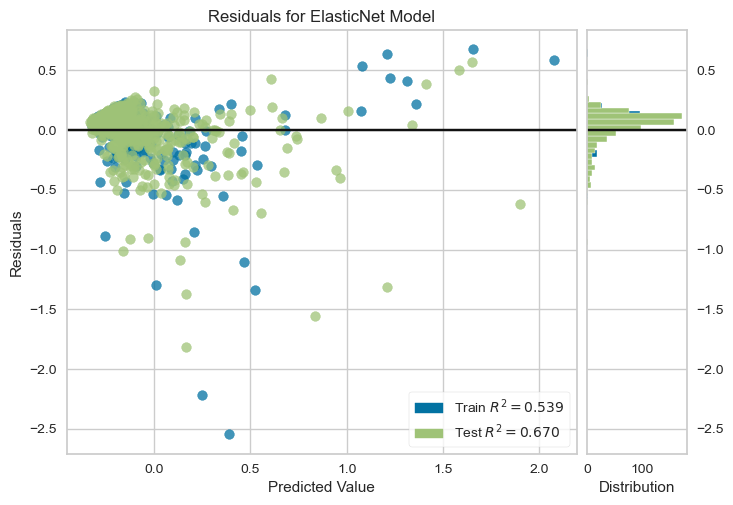

CPU times: user 863 ms, sys: 24.9 ms, total: 888 ms
Wall time: 894 ms


<AxesSubplot:title={'center':'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
%%time
elastic_energy_energystar = ElasticNet()
pg={"alpha": np.logspace(-5, 5, 1000), "l1_ratio":[.2, .4, .6, .8]}
best_model = tableau_energy_star(X_train_rfe_energy,y_train_rfe_energy,X_test_rfe_energy,y_test_rfe_energy,elastic_energy_energystar, pg)
visualizer_linear_rfe_energy = ResidualsPlot(best_model) 
visualizer_linear_rfe_energy.fit(X_train_rfe_energy, y_train_rfe_energy) 
visualizer_linear_rfe_energy.score(X_test_rfe_energy, y_test_rfe_energy)  
visualizer_linear_rfe_energy.show() 

###### Régressions RandomForestRegressor - ENERGY

score train= 0.638969 , score cv= 0.5904474635309119 , score test= 0.631418
best param= {'n_estimators': 30, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 9, 'max_depth': 2, 'criterion': 'absolute_error'}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


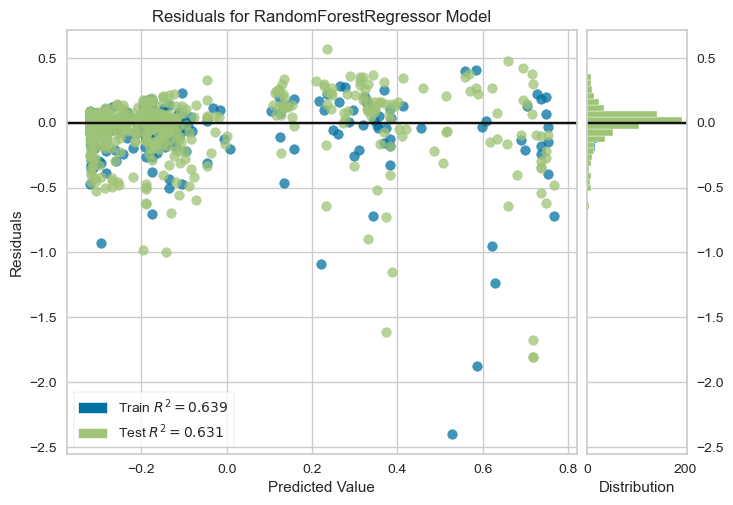

CPU times: user 5.81 s, sys: 118 ms, total: 5.92 s
Wall time: 6.38 s


<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
%%time
rfr_energy_energystar  = RandomForestRegressor(random_state=10)
pg={"n_estimators":[25 ,30, 35, 40, 45, 50], "criterion":["squared_error","absolute_error"],"max_depth":[2],
"min_samples_split":range(6,11),"min_samples_leaf":[4,5,6],"max_features" :range (6, X_train_rfe_energy.shape[1]+1)}

best_model = tableau_energy_star(X_train_rfe_energy,y_train_rfe_energy,X_test_rfe_energy,y_test_rfe_energy,rfr_energy_energystar,pg)

visualizer_linear_rfe_energy = ResidualsPlot(best_model) 
visualizer_linear_rfe_energy.fit(X_train_rfe_energy, y_train_rfe_energy) 
visualizer_linear_rfe_energy.score(X_test_rfe_energy, y_test_rfe_energy)  
visualizer_linear_rfe_energy.show() 

###### Regression GradientBoostingRegressor - Energy

score train= 0.97314 , score cv= 0.6113661268619606 , score test= 0.712531
best param= {'subsample': 1, 'random_state': 42, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


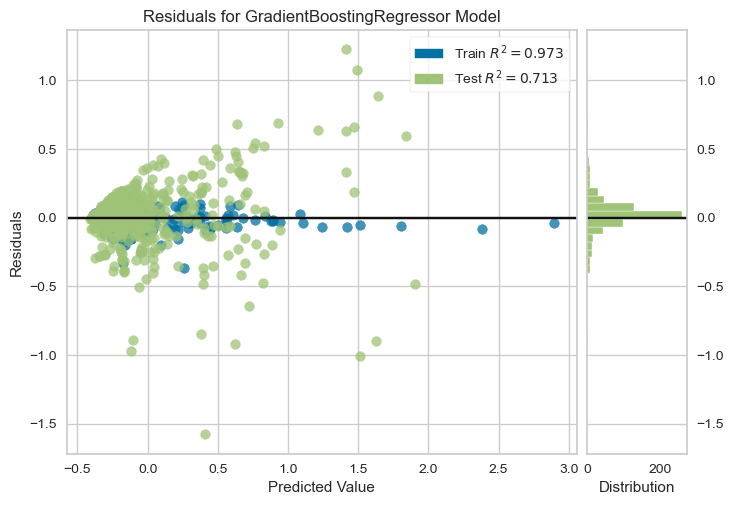

CPU times: user 2.37 s, sys: 46.7 ms, total: 2.42 s
Wall time: 3.63 s


<AxesSubplot:title={'center':'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [47]:
%%time
gbr_energy__energystar  =  GradientBoostingRegressor()
pg= {'n_estimators' : [10,20,50,100], 'learning_rate': [0.001, 0.01, 0.1],
            'max_depth':[1, 2, 4], 'subsample':[0.5, 0.75, 1], 'random_state':[42]}
best_model = tableau_energy_star(X_train_rfe_energy,y_train_rfe_energy,X_test_rfe_energy,y_test_rfe_energy,gbr_energy__energystar,pg)
visualizer_linear_rfe_energy = ResidualsPlot(best_model) 
visualizer_linear_rfe_energy.fit(X_train_rfe_energy, y_train_rfe_energy) 
visualizer_linear_rfe_energy.score(X_test_rfe_energy, y_test_rfe_energy)  
visualizer_linear_rfe_energy.show() 

###### TABLEAU DE REGRESSION - Model pour ENERGY avec ENERGYSTARSCORE

In [48]:
# TABLEAU DE REGRESSION - Model pour ENERGY avec ENERGYSTARSCORE
tableau_energy_energystar

,R² test,R² train,RMSE test,RMSE train,Prediction time,Best parameters,Best score
Modele pour energy avec ENERGYSTARSCORE,,,,,,,
LinearRegression(),0.67369,0.56343,0.04276,0.07163,0.00611,{},0.49151
Ridge(),0.67496,0.56341,0.04259,0.07164,0.00899,{'alpha': 0.8809372},0.49355
Lasso(),0.68003,0.54409,0.04193,0.07481,0.00558,{'alpha': 0.0089733},0.50220
ElasticNet(),0.67040,0.53944,0.04319,0.07557,0.00609,"{'l1_ratio': 0.6, 'alpha': 0.0220467}",0.51086
RandomForestRegressor(random_state=10),0.63142,0.63897,0.04830,0.05924,0.02837,"{'n_estimators': 30, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 9, 'max_depth': 2, 'criterion': 'absolute_error'}",0.59045
GradientBoostingRegressor(),0.71253,0.97314,0.03767,0.00441,0.00840,"{'subsample': 1, 'random_state': 42, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1}",0.61137


# - DATAFRAME-GHG SANS ENERGYSTARSCORE

In [49]:
X_train_no_ghg, X_test_no_ghg, y_train_no_ghg, y_test_no_ghg = train_test_split(ghg_df, y_ghg ,  train_size=0.33, random_state=42)

In [50]:
X_train_no_energy, X_test_no_energy, y_train_no_energy, y_test_no_energy = train_test_split(energy_df, y_energy ,  train_size=0.33, random_state=42)

In [51]:
tableau_ghg = pd.DataFrame(columns = ['R² test','R² train','RMSE test','RMSE train','Prediction time','Best parameters', "Best score"]).rename_axis('Modele pour GHG sans ENERGYSTARSCORE')

In [52]:
def ghg(X_train_no_ghg, y_train_no_ghg ,X_test_no_ghg ,y_test_no_ghg ,model,pg):
        
    model_ghg = RandomizedSearchCV(estimator = model, param_distributions=pg, scoring="r2",cv=5) #model
        
        
    model_ghg.fit(X_train_no_ghg, y_train_no_ghg) #Fit jeu d'entrainement
    start_time = time.time()   #préaparation du temps 
    score_test = round(r2_score(y_test_no_ghg,model_ghg.predict(X_test_no_ghg)), 6)  #calcul du score R² test
    score_train = round(r2_score(y_train_no_ghg,model_ghg.predict(X_train_no_ghg)),6)  #calcul du score R² train
    RMSE_test = round(mean_squared_error(y_test_no_ghg,model_ghg.predict(X_test_no_ghg)), 6)  #calcul de la RMSE test
    RMSE_train = round(mean_squared_error(y_train_no_ghg,model_ghg.predict(X_train_no_ghg)), 6)  #calcul de la RMSE train
    pred_time = round(time.time()-start_time, 7)  #calcul du temps 
    best_param = model_ghg.best_params_ # Détermination des meilleurs paramètres
    best_score = model_ghg.best_score_ # Détermination du meilleur score
    for k, v in best_param.items():
        if type(v)!= str :
            best_param[k] = round(v, 7)
            
    print("score train=",score_train, ", score cv=", best_score, ", score test=", score_test )
    print("best param=", best_param )
  
    return score_test, score_train,RMSE_test, RMSE_train, pred_time, best_param, best_score, model_ghg.best_estimator_


In [53]:
# préparation du dataframe 
def ghg_tableau(X_train_no_ghg,y_train_no_ghg,X_test_no_ghg,y_test_no_ghg,model,pg):
  
    score_test, score_train,RMSE_test, RMSE_train, pred_time, best_param, best_score, best_model =\
        ghg(X_train_no_ghg,y_train_no_ghg,X_test_no_ghg,y_test_no_ghg,model,pg)
    tableau_ghg.loc[str(model),:] = [ score_test, score_train,RMSE_test, RMSE_train, pred_time, best_param, best_score]
    
    return best_model

###### Régressions Simple - GHG 

/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


score train= 0.350783 , score cv= 0.24129541274087868 , score test= 0.464179
best param= {}


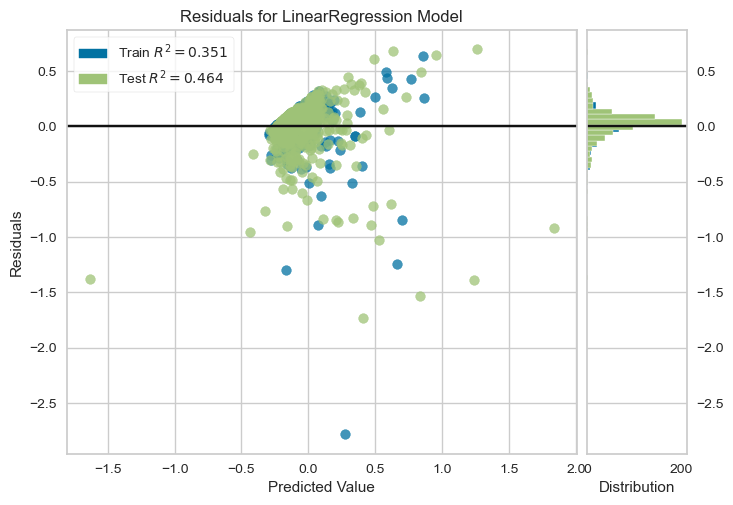

CPU times: user 1.04 s, sys: 37.1 ms, total: 1.07 s
Wall time: 1.19 s


<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [54]:
%%time
Linear_ghg = linear_model.LinearRegression()
pg={}
best_model= ghg_tableau(X_train_no_ghg,y_train_no_ghg,X_test_no_ghg,y_test_no_ghg,Linear_ghg, pg)
visualizer_linear_ghg = ResidualsPlot(best_model) 
visualizer_linear_ghg.fit(X_train_no_ghg, y_train_no_ghg) 
visualizer_linear_ghg.score(X_test_no_ghg, y_test_no_ghg)  
visualizer_linear_ghg.show() 

###### Régressions Ridge - GHG

score train= 0.302863 , score cv= 0.2667164589036354 , score test= 0.415883
best param= {'alpha': 44.3247859}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


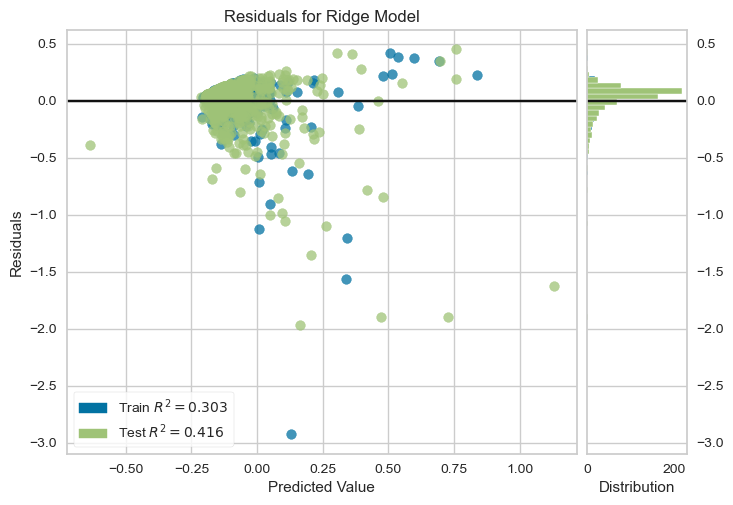

CPU times: user 1.5 s, sys: 45 ms, total: 1.54 s
Wall time: 2.13 s


<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [55]:
%%time
ridge_ghg = Ridge()
pg= {"alpha": np.logspace(-5, 5, 1000)}
best_model = ghg_tableau(X_train_no_ghg,y_train_no_ghg,X_test_no_ghg,y_test_no_ghg,ridge_ghg, pg)
visualizer_linear_ghg = ResidualsPlot(best_model) 
visualizer_linear_ghg.fit(X_train_no_ghg, y_train_no_ghg) 
visualizer_linear_ghg.score(X_test_no_ghg, y_test_no_ghg)  
visualizer_linear_ghg.show() 

###### Régressions Lasso - GHG

score train= 0.35064 , score cv= 0.24562492579722434 , score test= 0.465061
best param= {'alpha': 0.0003247}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


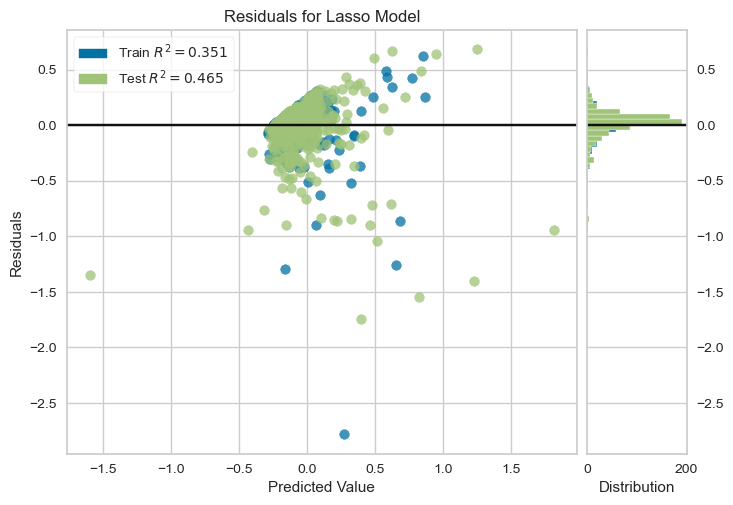

CPU times: user 1.25 s, sys: 22 ms, total: 1.27 s
Wall time: 1.59 s


<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [56]:
%%time
lasso_ghg = Lasso()
pg={"alpha": np.logspace(-5, 5, 1000)}
best_model = ghg_tableau(X_train_no_ghg,y_train_no_ghg,X_test_no_ghg,y_test_no_ghg,lasso_ghg,pg)
visualizer_linear_ghg = ResidualsPlot(best_model) 
visualizer_linear_ghg.fit(X_train_no_ghg, y_train_no_ghg) 
visualizer_linear_ghg.score(X_test_no_ghg, y_test_no_ghg)  
visualizer_linear_ghg.show() 

###### Régressions Elastic - GHG

score train= 0.339994 , score cv= 0.2587201001379841 , score test= 0.459681
best param= {'l1_ratio': 0.4, 'alpha': 0.0072923}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


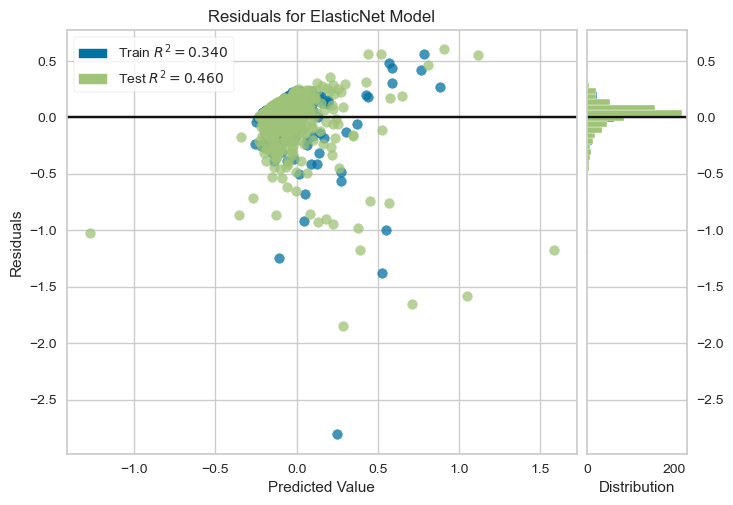

CPU times: user 980 ms, sys: 25.2 ms, total: 1.01 s
Wall time: 1.12 s


<AxesSubplot:title={'center':'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [57]:
%%time
elastic_ghg = ElasticNet()
pg={"alpha": np.logspace(-5, 5, 1000), "l1_ratio":[.2, .4, .6, .8]}
best_model = ghg_tableau(X_train_no_ghg,y_train_no_ghg,X_test_no_ghg,y_test_no_ghg,elastic_ghg, pg)
visualizer_linear_ghg = ResidualsPlot(best_model) 
visualizer_linear_ghg.fit(X_train_no_ghg, y_train_no_ghg) 
visualizer_linear_ghg.score(X_test_no_ghg, y_test_no_ghg)  
visualizer_linear_ghg.show() 

###### Régressions RandomForestRegressor - GHG

score train= 0.594573 , score cv= 0.36802957424859284 , score test= 0.435642
best param= {'n_estimators': 45, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 9, 'max_depth': 2, 'criterion': 'squared_error'}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


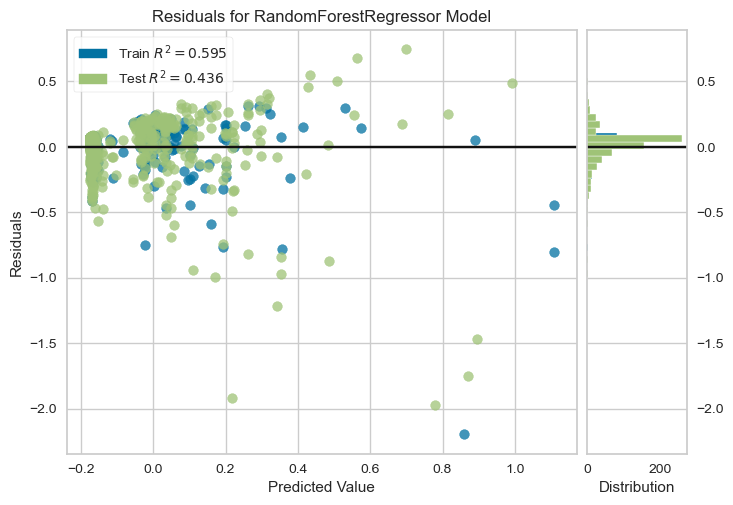

CPU times: user 4.66 s, sys: 92.7 ms, total: 4.76 s
Wall time: 5 s


<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [58]:
%%time
rfr_ghg = RandomForestRegressor(random_state=10)
pg={"n_estimators":[25 ,30, 35, 40, 45, 50], "criterion":["squared_error","absolute_error"],"max_depth":[2],
"min_samples_split":range(6,11),"min_samples_leaf":[4,5,6],"max_features" :range (6, X_train_no_ghg.shape[1]+1)}
best_model = ghg_tableau(X_train_no_ghg,y_train_no_ghg,X_test_no_ghg,y_test_no_ghg,rfr_ghg,pg)

visualizer_linear_ghg = ResidualsPlot(best_model) 
visualizer_linear_ghg.fit(X_train_no_ghg, y_train_no_ghg) 
visualizer_linear_ghg.score(X_test_no_ghg, y_test_no_ghg)  
visualizer_linear_ghg.show() 

###### Regression GradientBoostingRegressor - GHG

score train= 0.580835 , score cv= 0.4069483701749788 , score test= 0.346859
best param= {'subsample': 0.5, 'random_state': 42, 'n_estimators': 10, 'max_depth': 2, 'learning_rate': 0.1}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


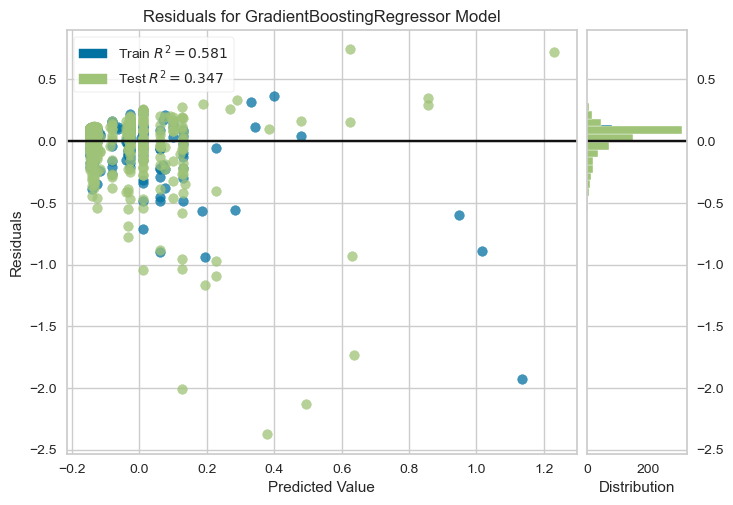

CPU times: user 1.9 s, sys: 46.6 ms, total: 1.95 s
Wall time: 2.11 s


<AxesSubplot:title={'center':'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [59]:
%%time
gbr_ghg = GradientBoostingRegressor()
pg= {'n_estimators' : [10,20,50,100], 'learning_rate': [0.001, 0.01, 0.1],'max_depth':[2], 
     'subsample':[0.5, 0.75, 1], 'random_state':[42]}
best_model = ghg_tableau(X_train_no_ghg,y_train_no_ghg,X_test_no_ghg,y_test_no_ghg,gbr_ghg,pg)

visualizer_linear_ghg = ResidualsPlot(best_model) 
visualizer_linear_ghg.fit(X_train_no_ghg, y_train_no_ghg) 
visualizer_linear_ghg.score(X_test_no_ghg, y_test_no_ghg)  
visualizer_linear_ghg.show() 

###### TABLEAU DE REGRESSION - Model pour GHG sans ENERGYSTARSCORE

In [60]:
# TABLEAU DE REGRESSION - Model pour GHG sans ENERGYSTARSCORE
tableau_ghg

,R² test,R² train,RMSE test,RMSE train,Prediction time,Best parameters,Best score
Modele pour GHG sans ENERGYSTARSCORE,,,,,,,
LinearRegression(),0.46418,0.35078,0.04495,0.05500,0.00857,{},0.24130
Ridge(),0.41588,0.30286,0.04900,0.05906,0.02156,{'alpha': 44.3247859},0.26672
Lasso(),0.46506,0.35064,0.04488,0.05502,0.02751,{'alpha': 0.0003247},0.24562
ElasticNet(),0.45968,0.33999,0.04533,0.05592,0.00702,"{'l1_ratio': 0.4, 'alpha': 0.0072923}",0.25872
RandomForestRegressor(random_state=10),0.43564,0.59457,0.04734,0.03435,0.05556,"{'n_estimators': 45, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 9, 'max_depth': 2, 'criterion': 'squared_error'}",0.36803
GradientBoostingRegressor(),0.34686,0.58083,0.05479,0.03551,0.01256,"{'subsample': 0.5, 'random_state': 42, 'n_estimators': 10, 'max_depth': 2, 'learning_rate': 0.1}",0.40695


# - DATAFRAME-ENERGY SANS ENERGYSTARSCORE

In [61]:
tableau_energy = pd.DataFrame(columns = ['R² test','R² train','RMSE test', 'RMSE train','Prediction time','Best parameters', "Best score"]).rename_axis('Modele pour ENERGY sans ENERGYSTARSCORE')

In [62]:
def energy_random(X_train_no_energy, y_train_no_energy ,X_test_no_energy ,y_test_no_energy,model,pg):

    model_energy = RandomizedSearchCV(estimator = model,  param_distributions=pg, scoring="r2",cv=5) #model
        
    model_energy.fit(X_train_no_energy, y_train_no_energy) #Fit jeu d'entrainement
    start_time = time.time()   #préaparation du temps 
    score_test = round(r2_score(y_test_no_energy,model_energy.predict(X_test_no_energy)), 6)  #calcul du score R² test
    score_train = round(r2_score(y_train_no_energy,model_energy.predict(X_train_no_energy)),6)  #calcul du score R² train
    RMSE_test = round(mean_squared_error(y_test_no_energy,model_energy.predict(X_test_no_energy)), 6)  #calcul de la RMSE test
    RMSE_train = round(mean_squared_error(y_train_no_energy,model_energy.predict(X_train_no_energy)), 6)  #calcul de la RMSE train
    pred_time = round(time.time()-start_time, 7)  #calcul du temps 
    best_param = model_energy.best_params_ # Détermination des meilleurs paramètres
    best_score = model_energy.best_score_ # Détermination du meilleur score
    for k, v in best_param.items():
        if type(v)!= str :
            best_param[k] = round(v, 7)
    
    print("score train=",score_train, ", score cv=", best_score, ", score test=", score_test )
    print("best param=", best_param )
    
    return score_test, score_train,RMSE_test, RMSE_train, pred_time, best_param, best_score, model_energy.best_estimator_



In [63]:
def en_tab_random(X_train_no_energy,y_train_no_energy,X_test_no_energy,y_test_no_energy,model,pg):
  
    score_test, score_train,RMSE_test, RMSE_train, pred_time, best_param, best_score, best_model =\
      energy_random(X_train_no_energy,y_train_no_energy,X_test_no_energy,y_test_no_energy,model,pg)
    tableau_energy.loc[str(model),:] = [ score_test, score_train,RMSE_test, RMSE_train,
                                        pred_time, best_param, best_score]
    
    return best_model

###### Régressions Simple - ENERGY 

score train= 0.548576 , score cv= 0.47507422537769867 , score test= 0.624645
best param= {}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


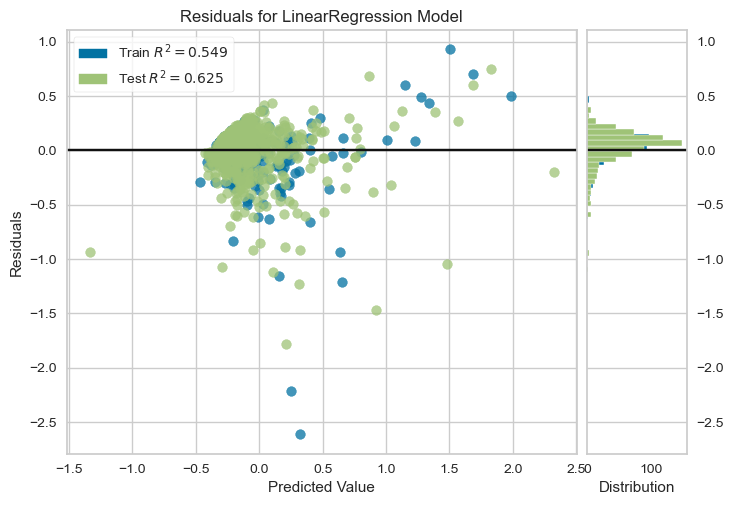

CPU times: user 903 ms, sys: 33.5 ms, total: 936 ms
Wall time: 823 ms


<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [64]:
%%time
Linear_energy = linear_model.LinearRegression()
pg={}
best_model = en_tab_random(X_train_no_energy,y_train_no_energy,X_test_no_energy,y_test_no_energy,Linear_energy, pg)
visualizer_linear_energy = ResidualsPlot(best_model) 
visualizer_linear_energy.fit(X_train_no_energy, y_train_no_energy) 
visualizer_linear_energy.score(X_test_no_energy, y_test_no_energy)  
visualizer_linear_energy.show() 

###### Régressions Ridge - ENERGY

score train= 0.548521 , score cv= 0.4783165510776124 , score test= 0.62678
best param= {'alpha': 1.3035122}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


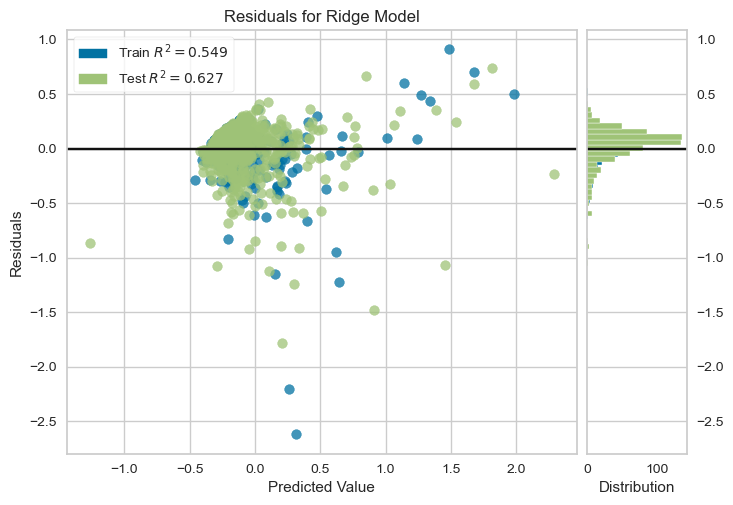

CPU times: user 1.34 s, sys: 43.1 ms, total: 1.38 s
Wall time: 1.16 s


<AxesSubplot:title={'center':'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [65]:
%%time
ridge_energy = Ridge()
pg={"alpha": np.logspace(-5, 5, 1000)}
best_model = en_tab_random(X_train_no_energy,y_train_no_energy,X_test_no_energy,y_test_no_energy,ridge_energy, pg)
visualizer_linear_energy = ResidualsPlot(best_model) 
visualizer_linear_energy.fit(X_train_no_energy, y_train_no_energy) 
visualizer_linear_energy.score(X_test_no_energy, y_test_no_energy)  
visualizer_linear_energy.show() 

###### Régressions Lasso - ENERGY

score train= 0.548576 , score cv= 0.47520851657858126 , score test= 0.624858
best param= {'alpha': 2.82e-05}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


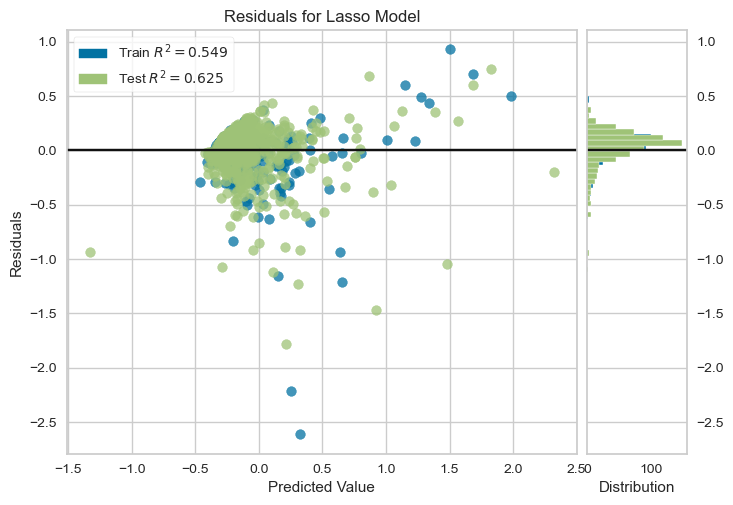

CPU times: user 929 ms, sys: 27.6 ms, total: 957 ms
Wall time: 994 ms


<AxesSubplot:title={'center':'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [66]:
%%time
lasso_energy = Lasso()
pg= {"alpha": np.logspace(-5, 5, 1000)}
best_model = en_tab_random(X_train_no_energy,y_train_no_energy,X_test_no_energy,y_test_no_energy,lasso_energy, pg)
visualizer_linear_energy = ResidualsPlot(best_model) 
visualizer_linear_energy.fit(X_train_no_energy, y_train_no_energy) 
visualizer_linear_energy.score(X_test_no_energy, y_test_no_energy)  
visualizer_linear_energy.show() 

###### Régressions Elastic - ENERGY

score train= 0.525506 , score cv= 0.4912206438054372 , score test= 0.633385
best param= {'l1_ratio': 0.6, 'alpha': 0.0171093}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


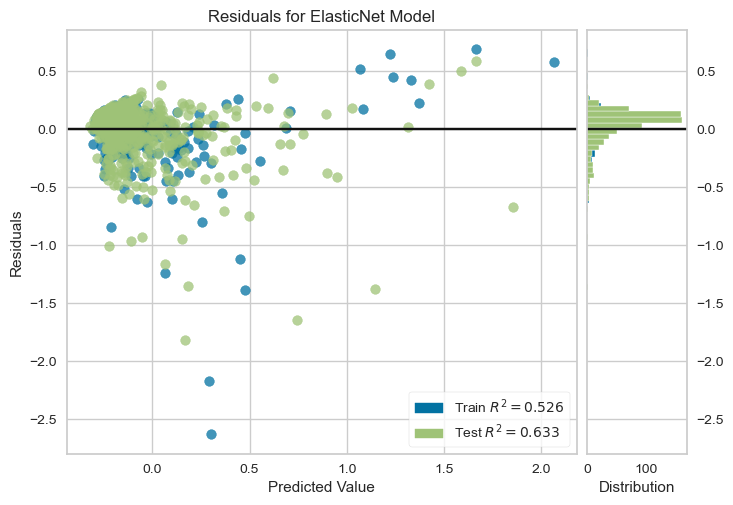

CPU times: user 1.26 s, sys: 47.6 ms, total: 1.31 s
Wall time: 2.28 s


<AxesSubplot:title={'center':'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [67]:
%%time
elastic_energy = ElasticNet()
pg = {"alpha": np.logspace(-5, 5, 1000), "l1_ratio":[.2, .4, .6, .8]}
best_model = en_tab_random(X_train_no_energy,y_train_no_energy,X_test_no_energy,y_test_no_energy,elastic_energy, pg)
visualizer_linear_energy = ResidualsPlot(best_model) 
visualizer_linear_energy.fit(X_train_no_energy, y_train_no_energy) 
visualizer_linear_energy.score(X_test_no_energy, y_test_no_energy)  
visualizer_linear_energy.show() 

###### Régressions RandomForestRegressor - ENERGY

score train= 0.629244 , score cv= 0.5856802110633943 , score test= 0.607302
best param= {'n_estimators': 35, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 8, 'max_depth': 2, 'criterion': 'absolute_error'}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


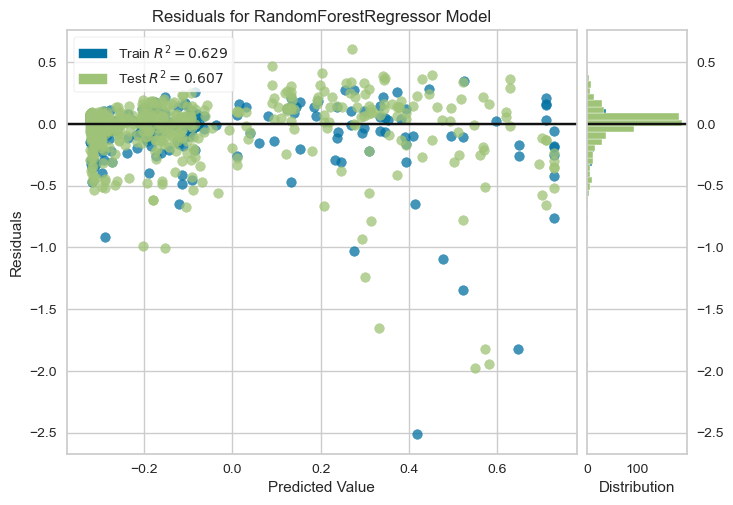

CPU times: user 6.05 s, sys: 144 ms, total: 6.2 s
Wall time: 8.45 s


<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [68]:
%%time
rfr_energy = RandomForestRegressor(random_state=10)
pg={"n_estimators":[25 ,30, 35, 40, 45, 50], "criterion":["squared_error","absolute_error"],"max_depth":[2],
"min_samples_split":range(6,11),"min_samples_leaf":[4,5,6],"max_features" :range (6, X_train_no_energy.shape[1]+1)}

best_model = en_tab_random(X_train_no_energy,y_train_no_energy,X_test_no_energy,y_test_no_energy,rfr_energy, pg)

visualizer_linear_energy = ResidualsPlot(best_model) 
visualizer_linear_energy.fit(X_train_no_energy, y_train_no_energy) 
visualizer_linear_energy.score(X_test_no_energy, y_test_no_energy)  
visualizer_linear_energy.show() 

###### Regression GradientBoostingRegressor - Energy

score train= 0.976716 , score cv= 0.6390909093601951 , score test= 0.62359
best param= {'subsample': 0.5, 'random_state': 42, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


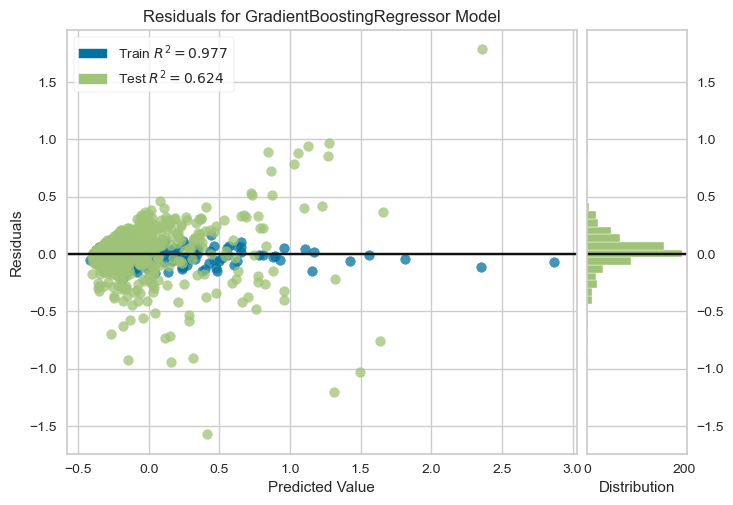

CPU times: user 2.08 s, sys: 28.7 ms, total: 2.11 s
Wall time: 2.14 s


<AxesSubplot:title={'center':'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [69]:
%%time
gbr_energy = GradientBoostingRegressor()
pg={'n_estimators' : [10,20,50,100], 'learning_rate': [0.001, 0.01, 0.1],'max_depth':[1, 2, 4], 
    'subsample':[0.5, 0.75, 1], 'random_state':[42]}
best_model = en_tab_random(X_train_no_energy,y_train_no_energy,X_test_no_energy,y_test_no_energy,gbr_energy,pg)

visualizer_linear_energy = ResidualsPlot(best_model) 
visualizer_linear_energy.fit(X_train_no_energy, y_train_no_energy) 
visualizer_linear_energy.score(X_test_no_energy, y_test_no_energy)  
visualizer_linear_energy.show() 

###### TABLEAU DE REGRESSION - Model pour ENERGY sans ENERGYSTARSCORE

In [70]:
# TABLEAU DE REGRESSION - Model pour Energy sans ENERGYSTARSCORE
tableau_energy

,R² test,R² train,RMSE test,RMSE train,Prediction time,Best parameters,Best score
Modele pour ENERGY sans ENERGYSTARSCORE,,,,,,,
LinearRegression(),0.62465,0.54858,0.04918,0.07407,0.00835,{},0.47507
Ridge(),0.62678,0.54852,0.04890,0.07408,0.00624,{'alpha': 1.3035122},0.47832
Lasso(),0.62486,0.54858,0.04916,0.07407,0.00580,{'alpha': 2.82e-05},0.47521
ElasticNet(),0.63338,0.52551,0.04804,0.07786,0.00548,"{'l1_ratio': 0.6, 'alpha': 0.0171093}",0.49122
RandomForestRegressor(random_state=10),0.60730,0.62924,0.05146,0.06084,0.02166,"{'n_estimators': 35, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 8, 'max_depth': 2, 'criterion': 'absolute_error'}",0.58568
GradientBoostingRegressor(),0.62359,0.97672,0.04932,0.00382,0.01044,"{'subsample': 0.5, 'random_state': 42, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1}",0.63909


# Shap Value / features importante

Le graphique récapitulatif SHAP montre l'effet moyen de chaque variable sur la sortie du modèle de prédiction.

Ainsi, nous pouvons voir quelles variables ont le plus d'influence sur les prédictions du modèle et comment leur influence varie en fonction des valeurs des variables.

In [82]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.5/436.5 kB 2.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [86]:
import shap

### Avec energy star score

Permutation explainer: 361it [01:37,  3.35it/s]                                 


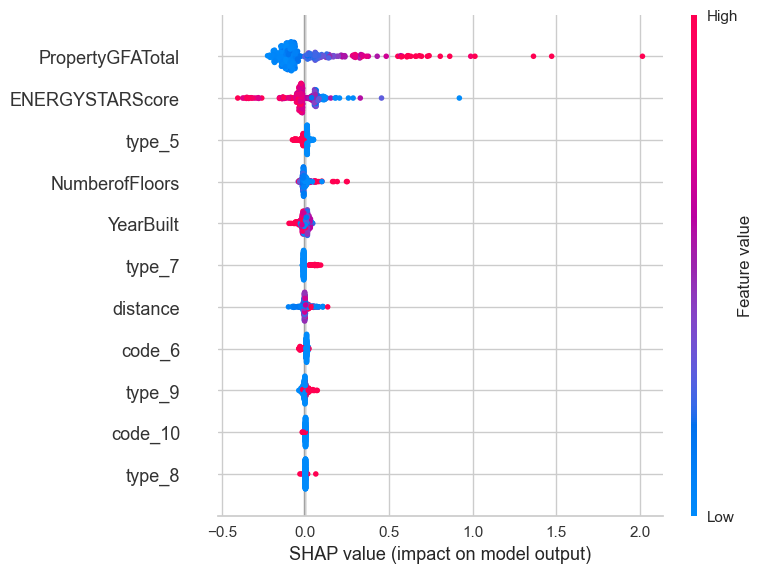

In [90]:
gr1 = GradientBoostingRegressor()
gr1.fit(X_train_rfe_ghg, y_train_rfe_ghg)


# Calcul des valeurs de Shapley pour la variable GHGGH avec energy star score
explainer1 = shap.Explainer(gr1.predict, X_train_rfe_ghg)
shap_values1 = explainer1(X_train_rfe_ghg)
shap.summary_plot(shap_values1, X_train_rfe_ghg)

Permutation explainer: 361it [01:46,  3.11it/s]                                 


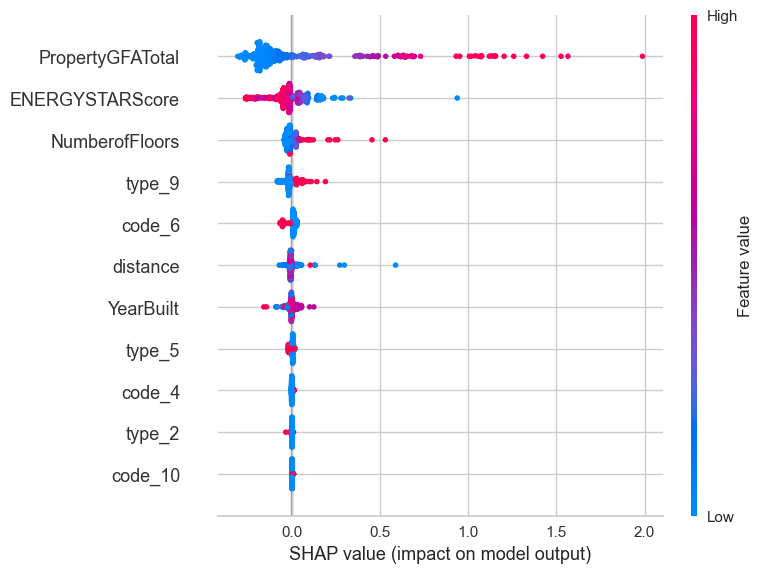

In [91]:
gr2 = GradientBoostingRegressor()
gr2.fit(X_train_rfe_energy, y_train_rfe_energy)


# Calcul des valeurs de Shapley pour la variable Energy avec energy star score
explainer1 = shap.Explainer(gr2.predict, X_train_rfe_energy)
shap_values1 = explainer1(X_train_rfe_energy)
shap.summary_plot(shap_values1, X_train_rfe_energy)

### sans Energy star score

Exact explainer: 361it [00:56,  5.20it/s]                                       


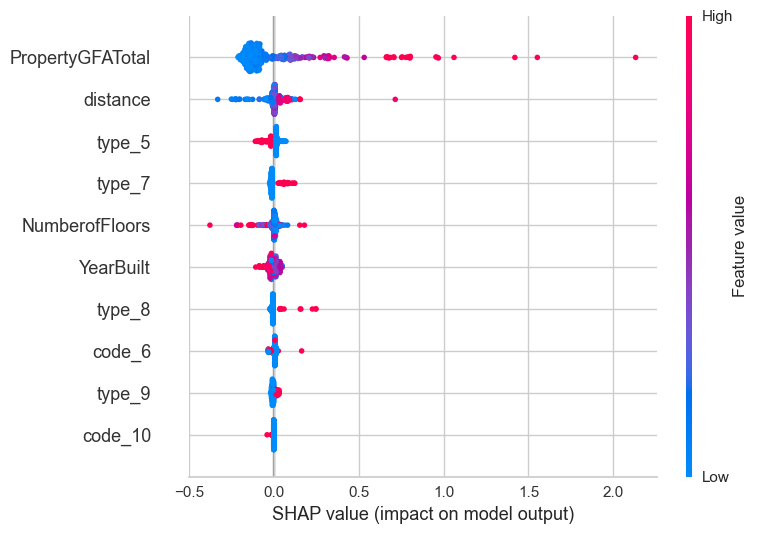

In [92]:
gr3 = GradientBoostingRegressor()
gr3.fit(X_train_no_ghg, y_train_no_ghg)


# Calcul des valeurs de Shapley pour la variable GHG sans energy star score
explainer1 = shap.Explainer(gr3.predict, X_train_no_ghg)
shap_values1 = explainer1(X_train_no_ghg)
shap.summary_plot(shap_values1, X_train_no_ghg)

Exact explainer: 361it [00:54,  5.71it/s]                                       


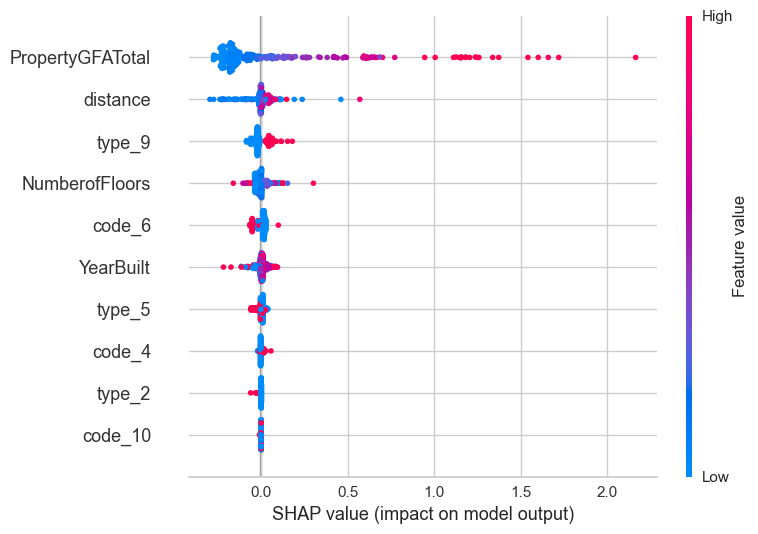

In [93]:
gr4 = GradientBoostingRegressor()
gr4.fit(X_train_no_energy, y_train_no_energy)


# Calcul des valeurs de Shapley pour la variable Energy
explainer1 = shap.Explainer(gr4.predict, X_train_no_energy)
shap_values1 = explainer1(X_train_no_energy)
shap.summary_plot(shap_values1, X_train_no_energy)